In [9]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
pip install emukit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

## Generate samples from the Forrester function



x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[40,0],[40,100],[50,50],[60,80]])

y_train_l =  np.array([0.2507382156,
0.2381159168,
0.2200474795,
0.209464005,
0.1963243573,
0.1641092421,
0.1545688867,
0.1445713693,
0.1367819646,
0.1251928921,
0.1097292963,
0.1026112168,
0.09297353899,
0.08699840507,
0.08040800986,
0.07239583902,
0.06697339319,
0.06697339319,
0.05639705844,
0.05126751838])
y_train_h = np.array([ 0.25904,0.19904,0.051769,0.073881,0.095123,0.16055])

In [12]:
x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]   

In [13]:
x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]   

In [14]:

X_train=np.append(x_train_l,x_train_h,axis=0)
Y_train=np.append(y_train_l,y_train_h,axis=0)
print(X_train)
print(Y_train)

[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 40.   0.   1.]
 [ 40. 100.   1.]
 [ 50.  50.   1.]
 [ 60.  80.   1.]]
[0.25073822 0.23811592 0.22004748 0.20946401 0.19632436 0.16410924
 0.07239584 0.14457137 0.13678196 0.12519289 0.1097293  0.10261122
 0.09297354 0.08699841 0.08040801 0.07239584 0.06697339 0.06697339
 0.05639706 0.05126752 0.25904    0.19904    0.051769   0.073881
 0.095123   0.073881  ]


In [15]:
print(X_train.shape[1])
Y_train=np.reshape(Y_train,(len(X_train),1))
print(Y_train)

3
[[0.25073822]
 [0.23811592]
 [0.22004748]
 [0.20946401]
 [0.19632436]
 [0.16410924]
 [0.16055]
 [0.14457137]
 [0.13678196]
 [0.12519289]
 [0.1097293 ]
 [0.10261122]
 [0.09297354]
 [0.08699841]
 [0.08040801]
 [0.07239584]
 [0.06697339]
 [0.06697339]
 [0.05639706]
 [0.05126752]
 [0.25904   ]
 [0.19904   ]
 [0.051769  ]
 [0.073881  ]
 [0.095123  ]
 [0.073881  ]]


In [16]:
kernels = [GPy.kern.RBF(2),GPy.kern.RBF(2)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 4, n_optimization_restarts=200)

## Fit the model
  
lin_mf_model.optimize()


Optimization restart 1/200, f = -42.12846822469348
Optimization restart 2/200, f = -42.12846822241277
Optimization restart 3/200, f = -42.12846822469195
Optimization restart 4/200, f = -42.12846823729738
Optimization restart 5/200, f = -42.128495325882874
Optimization restart 6/200, f = -42.128468224691915
Optimization restart 7/200, f = -42.128468224693876
Optimization restart 8/200, f = -42.128468224823955
Optimization restart 9/200, f = -42.1284682248923
Optimization restart 10/200, f = -42.12846822557299
Optimization restart 11/200, f = -42.1284682246951
Optimization restart 12/200, f = -42.12846822460492
Optimization restart 13/200, f = -42.12846822461323
Optimization restart 14/200, f = -42.12846822456008
Optimization restart 15/200, f = -42.1284682246951
Optimization restart 16/200, f = -42.128468224685115
Optimization restart 17/200, f = -42.12846822469509
Optimization restart 18/200, f = -42.128468224637
Optimization restart 19/200, f = -42.12846822469514
Optimization restart 

In [17]:
## Compute mean and variance predictions
#testx = np.linspace(40,70, 100, endpoint=True)

#testy= np.linspace(0,100, 100, endpoint=True)


#x = [(a, b) for a in testx for b in testy] 
#x=np.array([x])
#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,0],[60,30],[40,100],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]   
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]   

print(x_plot)

[[ 70  50]
 [ 60   0]
 [ 60  30]
 [ 40 100]
 [ 50  80]
 [ 40  30]]


In [18]:


## Compute mean predictions and associated variance

## Compute mean predictions and associated variance

lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)

hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)






In [19]:
print(lf_mean_lin_mf_model)

[[0.22004739]
 [0.12519306]
 [0.13678211]
 [0.07239382]
 [0.10261042]
 [0.0563971 ]]


In [20]:
print(hf_mean_lin_mf_model)

[[0.22550589]
 [0.1282986 ]
 [0.14017513]
 [0.0738829 ]
 [0.10515578]
 [0.05779608]]


In [21]:
## Create standard GP model using only high-fidelity data
x_train_DNS=np.array([[70,0],[70,100],[70,50],[60,0],[60,30],[60,80],[50,80],[50,50],[40,0],[40,30],[40,100]])
y_train_DNS=np.array([0.19904,
0.25904,
0.22548,
0.12664,
0.1376,
0.073881,
0.1055,
0.095123,
0.051769,
0.056826,
0.073881
])
x_train_DNS=np.c_[ x_train_DNS, np.ones(len(x_train_DNS)) ]   
y_train_DNS=np.reshape(y_train_DNS,(len(x_train_DNS),1))


kernel = GPy.kern.RBF(2)

In [22]:
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernel)
high_gp_model.Gaussian_noise.fix(0)

## Fit the GP model

high_gp_model.optimize_restarts(100)

Optimization restart 1/100, f = -5.6744251584077485
Optimization restart 2/100, f = -5.674425187394113
Optimization restart 3/100, f = -5.674425158407755
Optimization restart 4/100, f = -5.674425158406645
Optimization restart 5/100, f = -5.6744251584077166
Optimization restart 6/100, f = -5.674425158407756
Optimization restart 7/100, f = -5.674425158407746
Optimization restart 8/100, f = -5.674425158406252
Optimization restart 9/100, f = -5.6744251584025065


 /usr/local/lib/python3.8/dist-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 3. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


Optimization restart 10/100, f = -5.674438446663543
Optimization restart 11/100, f = -5.674425158407641
Optimization restart 12/100, f = -5.674425158428739
Optimization restart 13/100, f = -5.674425158407745
Optimization restart 14/100, f = -5.67442515840776
Optimization restart 15/100, f = -5.674425161216344
Optimization restart 16/100, f = -5.674425158406818
Optimization restart 17/100, f = -5.674425158407737
Optimization restart 18/100, f = -5.67443875174191
Optimization restart 19/100, f = -5.6744251584071375
Optimization restart 20/100, f = -5.6744251584077485
Optimization restart 21/100, f = -5.674425158407753
Optimization restart 22/100, f = -5.674425158407751
Optimization restart 23/100, f = -5.674425158407741
Optimization restart 24/100, f = -5.674425158407502
Optimization restart 25/100, f = -5.674425158407662
Optimization restart 26/100, f = -5.674425158407659
Optimization restart 27/100, f = -5.674425158407749
Optimization restart 28/100, f = -5.674425158404556
Optimization

In [23]:
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)


In [24]:
print(hf_mean_high_gp_model)
print(hf_mean_lin_mf_model)

[[0.22547984]
 [0.12664014]
 [0.13760001]
 [0.07388104]
 [0.10549978]
 [0.05682597]]
[[0.22550589]
 [0.1282986 ]
 [0.14017513]
 [0.0738829 ]
 [0.10515578]
 [0.05779608]]


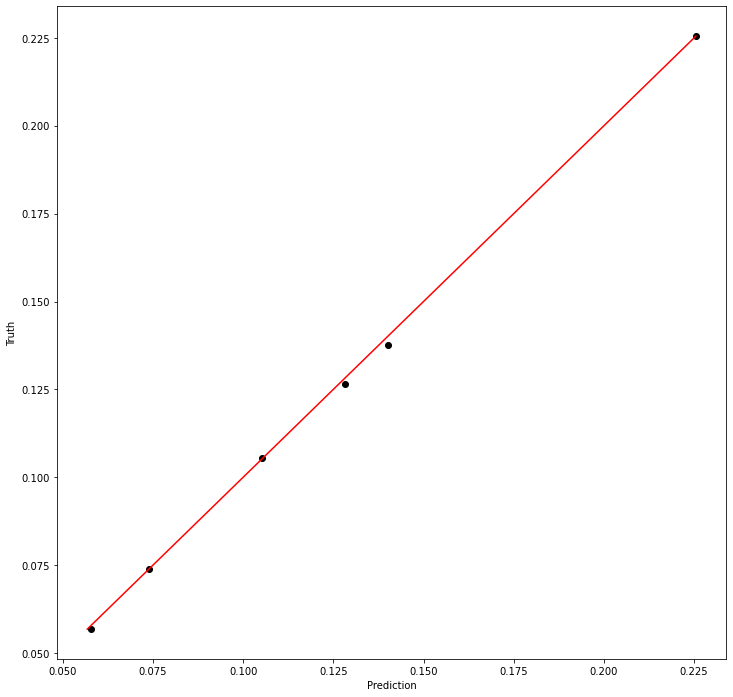

In [25]:
plt.figure(figsize=(12, 12))
plt.scatter(hf_mean_lin_mf_model, hf_mean_high_gp_model, c='black')
min_max = [hf_mean_high_gp_model.min(),hf_mean_high_gp_model.max()]
plt.plot(min_max, min_max, color='r')
plt.ylabel('Truth')
plt.xlabel('Prediction');

 /usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning:`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.


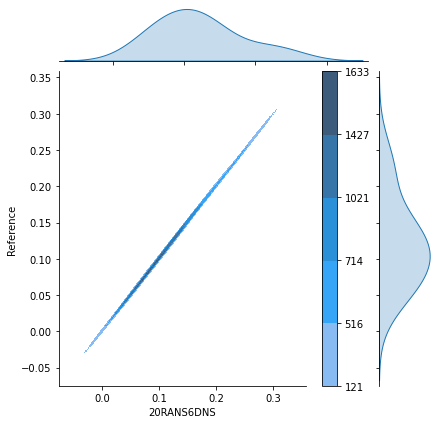

In [26]:
import pandas as pd
import seaborn as sns
df=pd.DataFrame({'20RANS6DNS': hf_mean_high_gp_model.flatten(),'Reference':hf_mean_lin_mf_model.flatten()})
rel=sns.jointplot(x="20RANS6DNS", y="Reference", kind = "kde",data = df, fill=True, n_levels = 6, shade = True, cbar = True, shade_lowest = False)
#rel.fig.suptitle("k=0.96")

plt.show()
